In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import string
import os.path
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import matplotlib.patches as mpatches
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def read_results(fpath='../../results/experimental/cell-based-assays.xlsx', sheet='Sheet2', to_drop=[0]):
    results = pd.read_excel(fpath, sheet, header=[0, 1, 2])
    results = results.set_index(('class', 'assay', 'concentration'))
    results = results.drop(results.columns[to_drop], axis=1)
    #results = results.drop(results.columns[0], axis=1)
    results = results.transpose()
    results = results.dropna(axis=0)
    results = results.rename_axis(['class', 'assay', 'concentration'], axis='index')
    results['conc'] = results.index.get_level_values('concentration')
    results['class'] = pd.Categorical(results.index.get_level_values('class'))
    new_class_names = [r'A$\beta$ clearance', r'A$\beta$ secretion', 'Tau phosphorylation', 'LPS neuroinflammation', 'Neurogenesis, neurite outgrowth', 'Trophic factor withdrawal']
    #new_class_names = [r'Abeta induced toxicity primary neurons', r'A$\beta$ clearance', r'A$\beta$ secretion', 'Tau phosphorylation', 'LPS neuroinflammation', 'Neurogenesis, neurite outgrowth', 'Trophic factor withdrawal']
    #new_class_names = pd.Series(new_class_names).drop(to_drop).to_list()
    #new_class_names = [r'A$\beta$ clearance', r'A$\beta$ secretion', 'Tau phosphorylation', 'LPS neuroinflammation', 'Neurogenesis, neurite outgrowth', 'Trophic factor withdrawal']
    subfig_labels = string.ascii_uppercase[:len(np.unique(results.index.get_level_values(0)))]
    new_class_names = [X + ')  ' + c for X, c in zip(list(string.ascii_uppercase)[:len(new_class_names)], new_class_names)]
    mapper = dict(zip(results['class'].cat.categories, new_class_names))
    results = results.drop('class', axis=1)
    results = results.rename(mapper, axis=0, level=0)
    results = results.rename(dict(zip(results.columns, ['Chenodiol', 'Cysteamine', 'Arundine'])), axis=1)
    return(results)

results = read_results(to_drop=[0])
results

('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c4                   0.0   
                                               c5                   0.0   
                                               c6                   0.0   
                              Abeta in Lysate  c4                   2.0   
                                               c5                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                   3.0   
                                               c2                   0.0   
                                               c3                   0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c4                    0.0   
                                               c5                    1.0   
                                               c6                    0.0   
                              Abeta in Lysate  c4                    0.0   
                                               c5                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                    0.0   
                                               c2                    0.0   
                                               c3                    0.0   

('class', 'assay', 'concentration')                           Arundine conc  
class                         assay            concentration                 
A)  A$\beta$ clearance        Abeta in SN      c4                  0.0   c4  
                                               c5                 -1.0   c5  
                                               c6                  0.0   c6  
                              Abeta in Lysate  c4                  0.0   c4  
                                               c5                  1.0   c5  
...                                                                ...  ...  
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   c2  
                                               c3                  0.0   c3  
                              LDH (cell death) c1                  0.0   c1  
                                               c2                  0.0   c2  
                                               c3                  0.0   c3  

[69 rows x 4 columns]

Ideal effect is the direction of effect of an ideal, hypothetical, neuroprotective drug on a given assay.

In [3]:
fpath = '../../results/2022-09-21-cell-based-assays/protect_sign.csv'
if os.path.exists(fpath):
    protect_sign = pd.read_csv(fpath, index_col=['class', 'assay', 'concentration']).squeeze()
else:
    protect_sign = pd.Series(0, index=results.index, dtype='int8')
    protect_sign.to_csv(fpath)

colname = 'ideal effect: increase (1) or decrease (-1)'
protect_supp_tab = protect_sign.groupby(axis=0, level=['class', 'assay']).first().to_frame(colname)
protect_supp_tab.to_csv('../../results/2022-09-21-cell-based-assays/protect_supp_tab.csv')
protect_supp_tab

ideal effect: increase (1) or decrease (-1)
class                               assay                                                               
A)  A$\beta$ clearance              Abeta in Lysate                                                    1
                                    Abeta in SN                                                       -1
                                    ratio                                                             -1
B)  A$\beta$ secretion              Ab1-38                                                            -1
                                    Ab1-40                                                            -1
                                    Ab1-42                                                            -1
C)  Tau phosphorylation             pTau231                                                           -1
                                    ratio                                                             -1
                                    total Tau                                                          1
D)  LPS neuroinflammation           IL-10                                                             -1
                                    IL-1b                                                             -1
                                    IL-6                                                              -1
                                    KC/GRO                                                            -1
                                    MTT                                                                1
                                    TNF-a                                                             -1
E)  Neurogenesis, neurite outgrowth BrdU positive neurons                                              1
                                    average longest neurite                                            1
                                    number of branches                                                 1
                                    total neurite area                                                 1
F)  Trophic factor withdrawal       LDH (cell death)                                                  -1
                                    MTT (viability)                                                    1
                                    PI (cell death)                                                   -1
                                    YOPRO (apoptosis)                                                 -1

In [4]:
def results2protective(results, protect_sign=protect_sign):
    results_protect = results.drop('conc', axis=1).apply(lambda col: col * protect_sign, axis=0)
    results_protect['conc'] = results.conc
    return(results_protect)

results_protect = results2protective(results, protect_sign=protect_sign)
results_protect

('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c4                  -0.0   
                                               c5                  -0.0   
                                               c6                  -0.0   
                              Abeta in Lysate  c4                   2.0   
                                               c5                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                  -3.0   
                                               c2                  -0.0   
                                               c3                  -0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c4                   -0.0   
                                               c5                   -1.0   
                                               c6                   -0.0   
                              Abeta in Lysate  c4                    0.0   
                                               c5                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                   -0.0   
                                               c2                   -0.0   
                                               c3                   -0.0   

('class', 'assay', 'concentration')                           Arundine conc  
class                         assay            concentration                 
A)  A$\beta$ clearance        Abeta in SN      c4                 -0.0   c4  
                                               c5                  1.0   c5  
                                               c6                 -0.0   c6  
                              Abeta in Lysate  c4                  0.0   c4  
                                               c5                  1.0   c5  
...                                                                ...  ...  
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   c2  
                                               c3                  0.0   c3  
                              LDH (cell death) c1                 -0.0   c1  
                                               c2                 -0.0   c2  
                                               c3                 -0.0   c3  

[69 rows x 4 columns]

In [5]:
plt.rcParams['figure.facecolor'] = 'lightgray'

In [6]:
gb_class = results.groupby('class')
assays_per_class = {name: len(df) / 3 for name, df in gb_class}
assays_per_class

{'A)  A$\\beta$ clearance': 3.0,
 'B)  A$\\beta$ secretion': 3.0,
 'C)  Tau phosphorylation': 3.0,
 'D)  LPS neuroinflammation': 6.0,
 'E)  Neurogenesis, neurite outgrowth': 4.0,
 'F)  Trophic factor withdrawal': 4.0}

['named-figure/cell-based-assays-absolute.png',
 'named-figure/cell-based-assays-absolute.pdf']

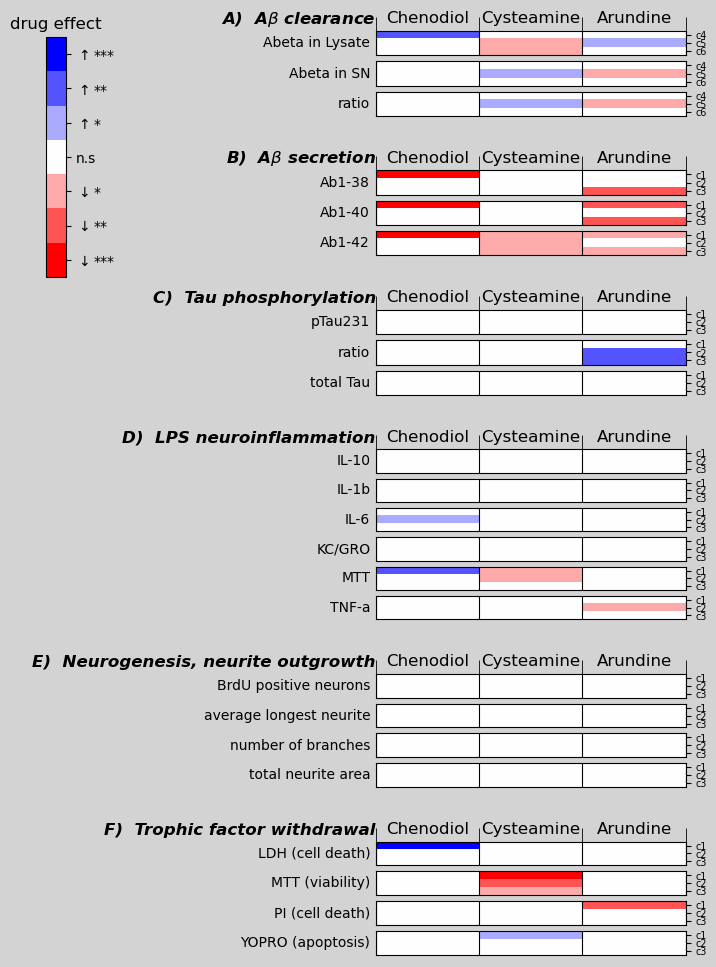

In [7]:
anonymizer = {
    'Chenodiol': 'drug A',
    'Cysteamine': 'drug B',
    'Arundine': 'drug C',
    'conc': 'conc'
}

def process_class(classname, classdata, i, fig, my_cmap, vmin, vmax, results=results):
    n_assays = int(len(classdata) / 3)
    first_assay_name = classdata.index.get_level_values('assay')[0]
    outer_grid = gridspec.GridSpec(len(gb_class), 1, height_ratios = list(assays_per_class.values()), figure=fig, hspace=0.5) 
    inner_gs = gridspec.GridSpecFromSubplotSpec(n_assays, 1, subplot_spec=outer_grid[i], hspace=0.25)
    gb_assay = classdata.groupby('assay')
    for j, zipitem in enumerate(zip(inner_gs, gb_assay)):
        cell, gbitem = zipitem
        ax = plt.subplot(cell)
        assay_name, assay_data = gbitem
        plot_assay(ax, assay_name, assay_data, my_cmap, vmin, vmax)
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=0, which='both', axis='x')
        if j == 0:
            ax.set_title(classname, loc='left', y=0.95, horizontalalignment='right', fontstyle='italic', fontweight='bold')
            ax.set_xticks(range(3))
            ax.set_xticklabels(results.columns[:-1], fontsize=12)#, rotation=-45, horizontalalignment='left')
            ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=10, which='minor')
    return(ax)

def plot_assay(axi, assay_name, assay_data, my_cmap, vmin, vmax):
        axi.imshow(assay_data.iloc[:, range(3)], aspect='auto', interpolation='none', cmap=my_cmap, vmin=vmin, vmax=vmax)
        axi.set_xticks(range(3))
        axi.set_yticks(range(assay_data.shape[0]))
        axi.set_yticklabels(assay_data.conc, fontsize=7)
        axi.set_ylabel(assay_name, rotation=0, verticalalignment='center', horizontalalignment='right')
        axi.tick_params(right=True, left=False, labelright=True, labelleft=False)
        axi.set_xticks([])
        axi.set_xticks(np.arange(4) - 0.5, minor=True)
        axi.grid(axis='x', which='minor', color='black')
        return(axi)

projector = {3: 1, 2: 1, 1: 1, 0: 0, -1: -1, -2: -1, -3: -3}
def simplify_results(results, projector=projector):
    val = results.drop('conc', axis=1).applymap(lambda x: projector[x] if not pd.isna(x) else x)
    val['conc'] = results.conc
    return(val)

def my_figure(protective=False, simplify=False, protective_cmap='RdYlGn', anonymize=False):
    res = results_protect if protective else results
    res = res.rename(anonymizer, axis=1) if anonymize else res
    res = simplify_results(res) if simplify else res
    gb_class = res.groupby('class')
    cmap = protective_cmap if protective else 'bwr_r'
    #cmap = 'PiYG' if protective else 'bwr_r'
    n_levels = 3 if simplify else 7
    my_cmap = matplotlib.colors.ListedColormap(matplotlib.colormaps[cmap](np.linspace(0, 1, n_levels)))
    vmin = -1.5 if simplify else -3.5
    vmax = 1.5 if simplify else 3.5
    fig = plt.figure(figsize=(4, 12))
    for i, classinfo in enumerate(gb_class):
        classname, classdata = classinfo
        axi = process_class(classname, classdata, i, fig, my_cmap=my_cmap, vmin=vmin, vmax=vmax, results=res)
    #my_patch = mpatches.Patch(color='green', alpha=0.5, label='TWAS2+ gene set')
    cb_ax = fig.add_axes([-0.7, 0.675, 0.05, 0.20])
    cm = plt.cm.ScalarMappable(cmap=my_cmap)
    cm.set_clim(vmin=vmin, vmax=vmax)
    fig.colorbar(cm, cax=cb_ax)
    cb_ax.set_yticks(np.arange(-1 if simplify else -3, 2 if simplify else 4, 1))
    ticklab_abs = [r'$\downarrow$', r'n.s', r'$\uparrow$'] if simplify else [r'$\downarrow$***', r'$\downarrow$**', r'$\downarrow$*', r'n.s', r'$\uparrow$*', r'$\uparrow$**', r'$\uparrow$***']
    ticklab_prot = [r'adverse', r'n.s', r'protective'] if simplify else [r'*** adverse', r'**', r'*', r'n.s', r'*', r'**', r'*** protective']
    cb_ax.set_yticklabels(ticklab_prot if protective else ticklab_abs)
    cb_ax.set_title('drug effect')
    return(fig)

fig = my_figure(protective=False)
fig
attila_utils.savefig(fig, 'cell-based-assays-absolute')

['named-figure/cell-based-assays.png', 'named-figure/cell-based-assays.pdf']

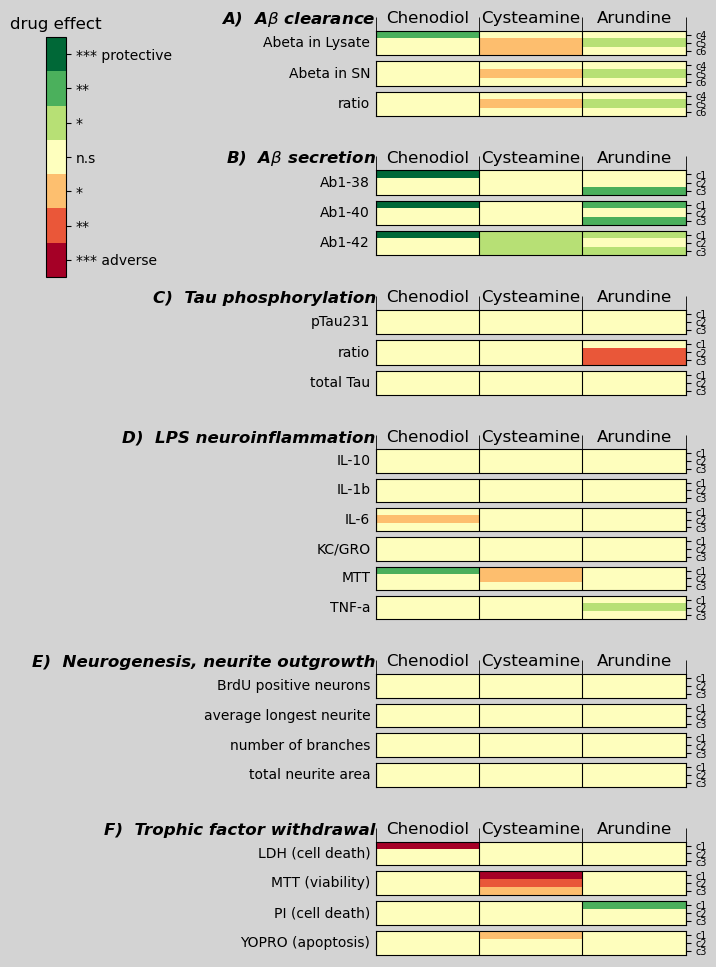

In [8]:
fig = my_figure(protective=True)
fig
attila_utils.savefig(fig, 'cell-based-assays')

['named-figure/cell-based-assays-simplified.png',
 'named-figure/cell-based-assays-simplified.pdf']

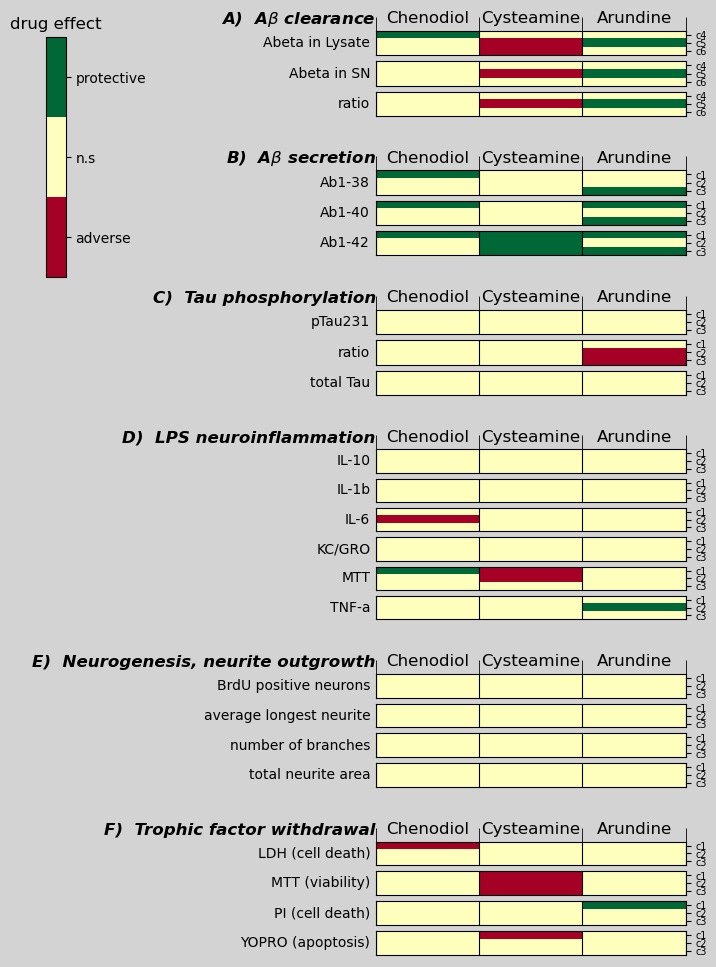

In [9]:
fig = my_figure(protective=True, simplify=True)
fig
attila_utils.savefig(fig, 'cell-based-assays-simplified')

['named-figure/cell-based-assays-simplified-anonimized.png',
 'named-figure/cell-based-assays-simplified-anonimized.pdf']

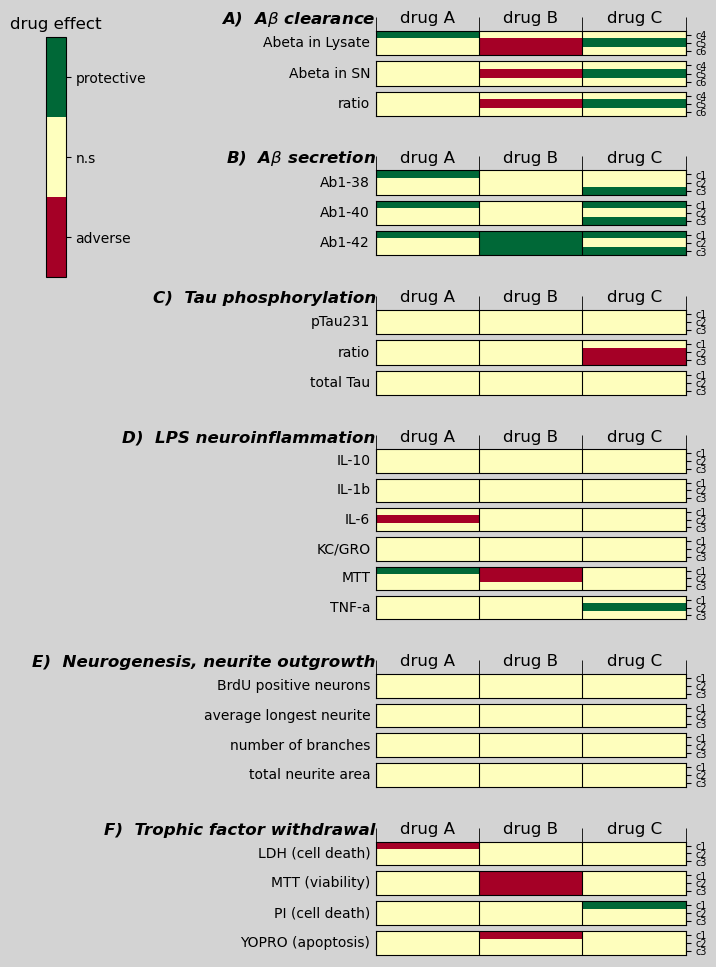

In [10]:
fig = my_figure(protective=True, simplify=True, anonymize=True)
fig
attila_utils.savefig(fig, 'cell-based-assays-simplified-anonimized')

## All results

In [11]:
results_all = read_results(sheet='Sheet3')
results_all

('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c4                   0.0   
                                               c5                   0.0   
                                               c6                   0.0   
                              Abeta in Lysate  c4                   2.0   
                                               c5                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                   3.0   
                                               c2                   0.0   
                                               c3                   0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c4                    0.0   
                                               c5                    1.0   
                                               c6                    0.0   
                              Abeta in Lysate  c4                    0.0   
                                               c5                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                    0.0   
                                               c2                    0.0   
                                               c3                    0.0   

('class', 'assay', 'concentration')                           Arundine  \
class                         assay            concentration             
A)  A$\beta$ clearance        Abeta in SN      c4                  0.0   
                                               c5                 -1.0   
                                               c6                  0.0   
                              Abeta in Lysate  c4                  0.0   
                                               c5                  1.0   
...                                                                ...   
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   
                                               c3                  0.0   
                              LDH (cell death) c1                  0.0   
                                               c2                  0.0   
                                               c3                  0.0   

('class', 'assay', 'concentration')                           Valproic Acid  \
class                         assay            concentration                  
A)  A$\beta$ clearance        Abeta in SN      c4                       0.0   
                                               c5                       0.0   
                                               c6                       1.0   
                              Abeta in Lysate  c4                       0.0   
                                               c5                       0.0   
...                                                                     ...   
F)  Trophic factor withdrawal MTT (viability)  c2                      -1.0   
                                               c3                       0.0   
                              LDH (cell death) c1                       0.0   
                                               c2                       0.0   
                                               c3                       0.0   

('class', 'assay', 'concentration')         

In [12]:
results_all_protect = results2protective(results_all, protect_sign=protect_sign)
results_all_protect

('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c4                  -0.0   
                                               c5                  -0.0   
                                               c6                  -0.0   
                              Abeta in Lysate  c4                   2.0   
                                               c5                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                  -3.0   
                                               c2                  -0.0   
                                               c3                  -0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c4                   -0.0   
                                               c5                   -1.0   
                                               c6                   -0.0   
                              Abeta in Lysate  c4                    0.0   
                                               c5                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                   -0.0   
                                               c2                   -0.0   
                                               c3                   -0.0   

('class', 'assay', 'concentration')                           Arundine  \
class                         assay            concentration             
A)  A$\beta$ clearance        Abeta in SN      c4                 -0.0   
                                               c5                  1.0   
                                               c6                 -0.0   
                              Abeta in Lysate  c4                  0.0   
                                               c5                  1.0   
...                                                                ...   
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   
                                               c3                  0.0   
                              LDH (cell death) c1                 -0.0   
                                               c2                 -0.0   
                                               c3                 -0.0   

('class', 'assay', 'concentration')                           Valproic Acid  \
class                         assay            concentration                  
A)  A$\beta$ clearance        Abeta in SN      c4                      -0.0   
                                               c5                      -0.0   
                                               c6                      -1.0   
                              Abeta in Lysate  c4                       0.0   
                                               c5                       0.0   
...                                                                     ...   
F)  Trophic factor withdrawal MTT (viability)  c2                      -1.0   
                                               c3                       0.0   
                              LDH (cell death) c1                      -0.0   
                                               c2                      -0.0   
                                               c3                      -0.0   

('class', 'assay', 'concentration')         

In [13]:
agg_assay = results_all_protect.groupby(axis=0, level=1, sort=False).mean().transpose()
agg_assay
agg_experiment = results_all_protect.groupby(axis=0, level=0, sort=False).mean().transpose()
agg_experiment

class,A) A$\beta$ clearance,B) A$\beta$ secretion,C) Tau phosphorylation,D) LPS neuroinflammation,"E) Neurogenesis, neurite outgrowth",F) Trophic factor withdrawal
"(class, assay, concentration)",,,,,,
Chenodiol,0.222222,1.000000,0.000000,0.055556,0.000000,-0.250000
Cysteamine,-0.444444,0.333333,0.000000,-0.111111,0.000000,-0.583333
Arundine,0.333333,0.888889,-0.444444,0.055556,0.000000,0.166667
Valproic Acid,0.000000,0.111111,0.000000,0.277778,0.000000,0.750000
Salbutamol,-0.111111,0.000000,0.000000,1.055556,0.250000,0.000000
Sildenafil,0.222222,-0.111111,0.000000,0.388889,0.000000,0.000000
Probenecid,0.111111,0.000000,0.000000,0.222222,0.000000,0.250000
Montelukast,0.000000,0.000000,0.000000,0.944444,-0.083333,-1.583333
Felodipine,0.222222,1.000000,0.000000,1.166667,0.083333,0.000000


In [14]:
def my_heatmap(df):
    fig, ax = plt.subplots()
    im = ax.imshow(X=df,cmap='RdYlGn')
    cbar = ax.figure.colorbar(im, ax=ax)
    ax_cbar = fig.get_axes()[1]
    ax_cbar.set_ylabel('Neuroprotectivity')
    #ax_cbar.set_title('Neuroprotectivity')
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(df.index)
    return((fig, ax))

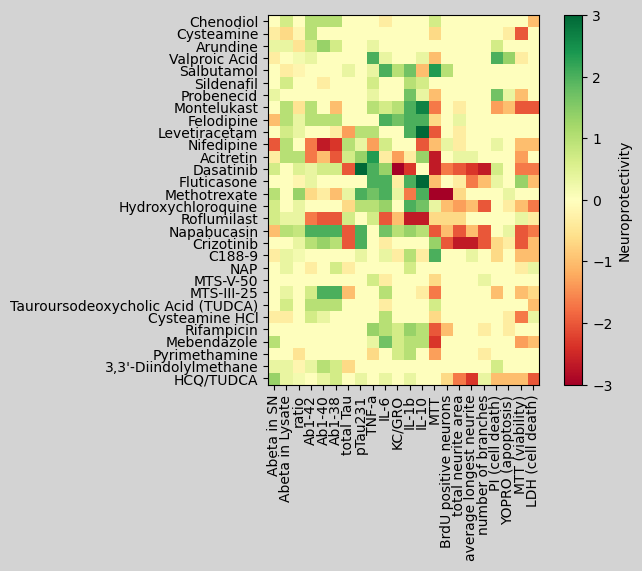

In [15]:
fig, ax = my_heatmap(agg_assay)

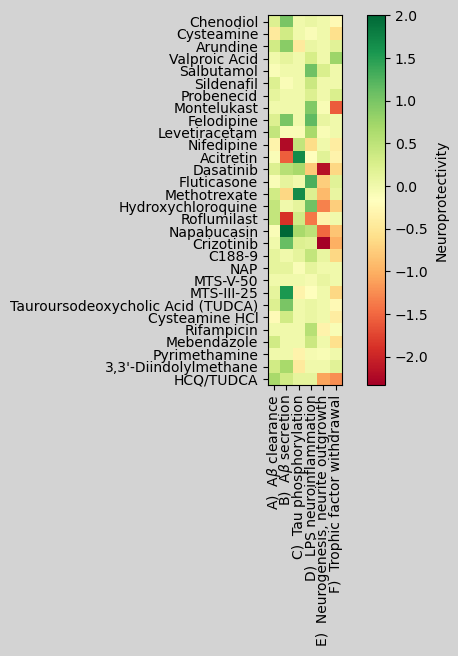

In [16]:
fig, ax = my_heatmap(agg_experiment)

In [17]:
{c: i for c, i in zip(agg_experiment.columns, np.arange(agg_experiment.shape[1]))}

{'A)  A$\\beta$ clearance': 0,
 'B)  A$\\beta$ secretion': 1,
 'C)  Tau phosphorylation': 2,
 'D)  LPS neuroinflammation': 3,
 'E)  Neurogenesis, neurite outgrowth': 4,
 'F)  Trophic factor withdrawal': 5}

In [18]:
def score_drugs(aggdf, ix=[0, 1, 3], weights=[1, 1, 1]):
    df = aggdf.iloc[:, ix]
    weights = [w / sum(weights) * 3 for w in weights]
    df = pd.concat([w * df[s] for s, w in zip(df, weights)], 1)
    s = df.sum(1)
    s = s.sort_values(ascending=False)
    return(s)

score_drugs(agg_experiment)
#pd.concat([score_drugs(agg_experiment), score_drugs(agg_experiment, weights=[1, 1, 2])], axis=1)

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_21336/2172027676.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([w * df[s] for s, w in zip(df, weights)], 1)


(class, assay, concentration)
Felodipine                           2.388889
Napabucasin                          2.388889
Hydroxychloroquine                   1.500000
MTS-III-25                           1.500000
Tauroursodeoxycholic Acid (TUDCA)    1.277778
Crizotinib                           1.277778
Chenodiol                            1.277778
Fluticasone                          1.277778
Arundine                             1.277778
HCQ/TUDCA                            1.111111
Levetiracetam                        1.000000
3,3'-Diindolylmethane                1.000000
Montelukast                          0.944444
Salbutamol                           0.944444
Mebendazole                          0.722222
Rifampicin                           0.555556
C188-9                               0.555556
Sildenafil                           0.500000
Valproic Acid                        0.388889
Probenecid                           0.333333
NAP                                  0.333333
Cyst

In [19]:
%connect_info

{
  "shell_port": 64352,
  "iopub_port": 64353,
  "stdin_port": 64354,
  "control_port": 64356,
  "hb_port": 64355,
  "ip": "127.0.0.1",
  "key": "6fea92b5-460133d6bbec1c6911fb347a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-c3a5947f-8217-4d38-88db-80fb40a46ef2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
